In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

#### Load Evaporative Exposure results header into string array to use as header array

In [2]:
# Evaporative Exposure
with open('/Users/rmueller/Projects/MIDOSS/results/MediumFloater/SOG_21nov17-28nov17_EvapExposureTest/resOilOutput.sro', 'r') as the_file:
    all_data = [line.strip() for line in the_file.readlines()]
    header = all_data[4]  
    
# Order header into list array by splitting up string
header_arr = []
header_arr = header.split(' ')
# Remove emtpy entries from list
header_arr = np.asarray([x for x in header_arr if x != ''])
header_arr

array(['Seconds', 'YY', 'MM', 'DD', 'hh', 'mm', 'ss', 'MassOil',
       'VolOilBeached', 'VolumeBeached', 'VolumeOil', 'Volume', 'Area',
       'TeoricalArea', 'Thickness', 'MEvaporated', 'VEvaporated',
       'FMEvaporated', 'MDispersed', 'VDispersed', 'FMDispersed',
       'MSedimented', 'VSedimented', 'FMSedimented', 'MDissolved',
       'VDissolved', 'FMDissolved', 'MChemDisp', 'VChemDisp', 'FMChemDisp',
       'MOilRecovered', 'VOilRecovered', 'FMOilRecovered', 'MWaterContent',
       'VWaterContent', 'Density', 'Viscosity', 'MBio', 'VBio', 'FMBio',
       'CharacteristicDiameter', 'P_Star', 'AnalyteMass1', 'AnalyteMass2',
       'AnalyteMass3', 'AnalyteMass4', 'AnalyteMass5', 'AnalyteBio1',
       'AnalyteBio2', 'AnalyteBio3', 'AnalyteBio4', 'AnalyteBio5'],
      dtype='<U22')

#### Load Evaporative Exposure output 

In [3]:
EvapExp_in = '/Users/rmueller/Projects/MIDOSS/results/MediumFloater/SOG_21nov17-28nov17_EvapExposureTest/resOilOutput.sro'
file_in = EvapExp_in
data_EE2D = np.genfromtxt(file_in, skip_header=6, skip_footer=4)/1000
nrows,ncols = data_EE2D.shape

#### Load Fingas Evaporation output 

In [4]:
Fingas_in = '/Users/rmueller/Projects/MIDOSS/results/MediumFloater/SOG_21nov17-28nov17_FingasEvapTest/resOilOutput.sro'
file_in = Fingas_in
data_Fingas2D = np.genfromtxt(file_in, skip_header=6, skip_footer=4)/1000
nrows,ncols = data_Fingas2D.shape

#### Create structured Array

In [5]:
# define structure of structured array
# This doesn't appear to be correct, but I haven't yet figured out what I've done wrong with the datatype
dtype = [('Header',(np.str_,22)),('Values', np.float64)]

# create index list for for-loop over columns
header_range = range(header_arr.size)
data_range = range(nrows)

# Assign 2D data and header strings to structured array
massbalance_EE = np.array([[(header_arr[hdr_index], data_EE2D[data_index, hdr_index]) for hdr_index in header_range] for data_index in data_range], dtype=dtype)
massbalance_Fingas = np.array([[(header_arr[hdr_index], data_Fingas2D[data_index, hdr_index]) for hdr_index in header_range] for data_index in data_range], dtype=dtype)

In [6]:
massbalance_EE.shape

(191, 52)

#### Plot results

In [7]:
plot_data = [15,18,24,37]
header_arr[plot_data]

array(['MEvaporated', 'MDispersed', 'MDissolved', 'MBio'],
      dtype='<U22')

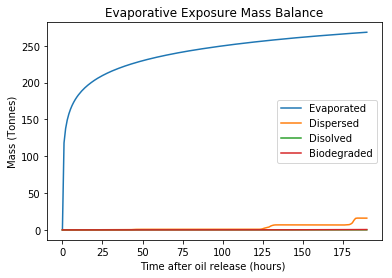

In [11]:
plot_data = [15,18,24,37]
#plt.plot([data_EE2D[range(191), data_index] for data_index in plot_data])
plt.plot(data_EE2D[range(191), plot_data[0]])
plt.plot(data_EE2D[range(191), plot_data[1]])
plt.plot(data_EE2D[range(191), plot_data[2]])
plt.plot(data_EE2D[range(191), plot_data[3]])
plt.ylabel('Mass (Tonnes)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['Evaporated', 'Dispersed','Disolved','Biodegraded'])
plt.title('Evaporative Exposure Mass Balance')
plt.savefig('MB_EvapExp.png')

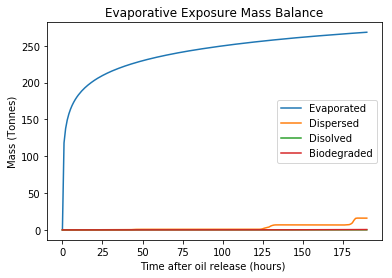

In [12]:
plot_data = [15,18,24,37]
#plt.plot([data_EE2D[range(191), data_index] for data_index in plot_data])
plt.plot(data_Fingas2D[range(191), plot_data[0]])
plt.plot(data_Fingas2D[range(191), plot_data[1]])
plt.plot(data_Fingas2D[range(191), plot_data[2]])
plt.plot(data_Fingas2D[range(191), plot_data[3]])
plt.ylabel('Mass (Tonnes)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['Evaporated', 'Dispersed','Disolved','Biodegraded'])
plt.title('Fingas Evaporation Mass Balance')
plt.savefig('MB_Fingas.png')

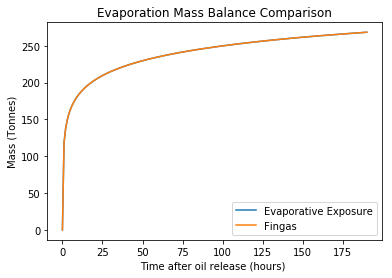

In [13]:
plot_data = [15,18,24,37]
#plt.plot([data_EE2D[range(191), data_index] for data_index in plot_data])
plt.plot(data_EE2D[range(191), plot_data[0]])
plt.plot(data_Fingas2D[range(191), plot_data[0]])
plt.ylabel('Mass (Tonnes)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['Evaporative Exposure', 'Fingas'])
plt.title('Evaporation Mass Balance Comparison')
plt.savefig('MB_Fingas_EE_Comparison.png')